In [1]:

import pickle
import sys
sys.path.insert(1, './functions/')
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import os
from utility import create_folder
from fun_data2 import Data2


In [2]:
scale = 5
cm2inch = 0.39
ssmall_SIZE = 3*scale
SMALL_SIZE = 4*scale
MEDIUM_SIZE = 6*scale
BIGGER_SIZE = 8*scale
LINE_WIDTH = 2*2
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('lines', linewidth=LINE_WIDTH)


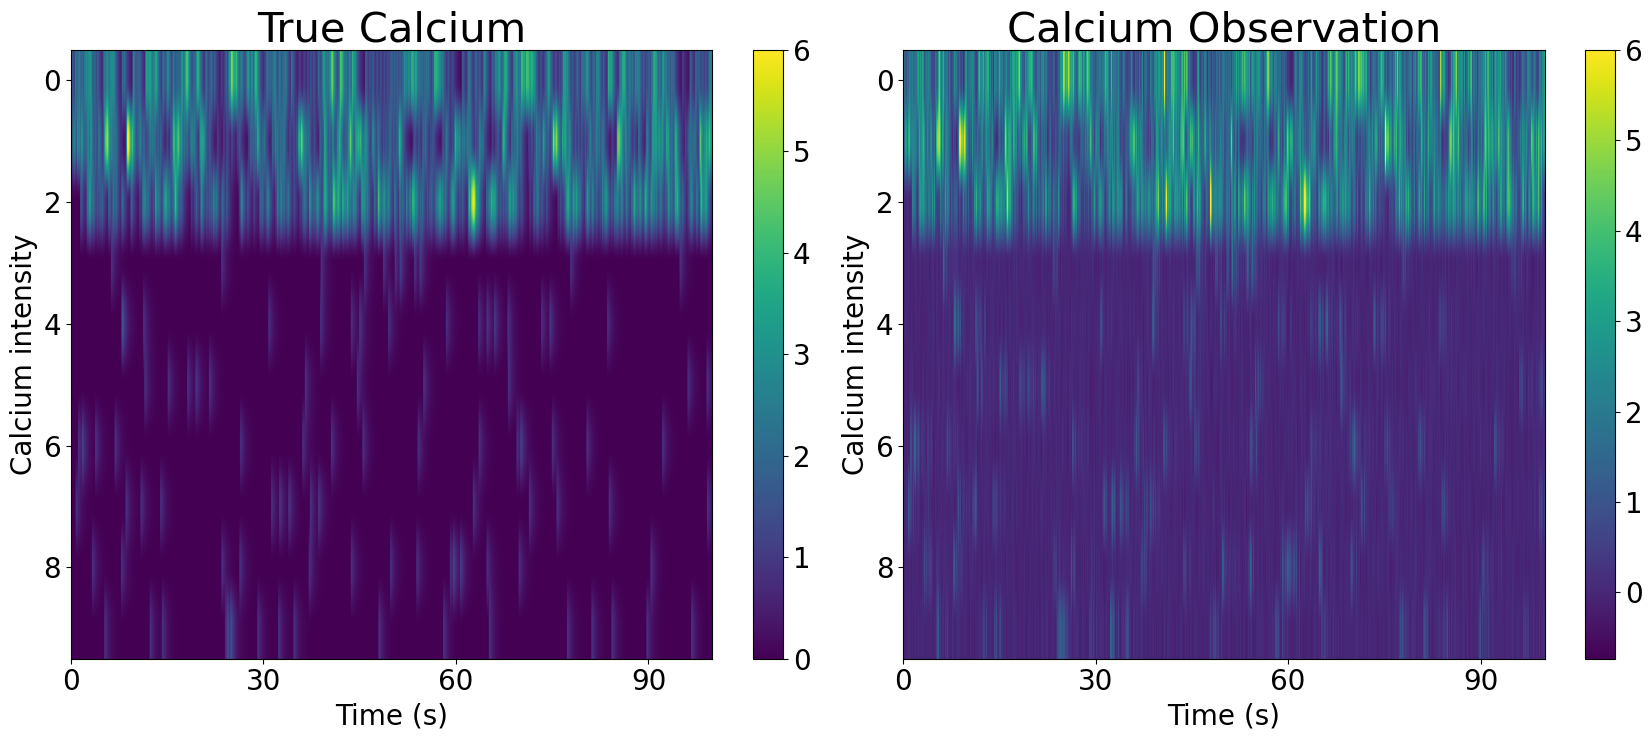

In [3]:
import fun_data2; reload(fun_data2)


from fun_models_class import Models

savepath = './figs/artificial_data_calcium/'
T = 3000
rho = 0.8
sn_kappa = 0.3
type = 'kappa' # kappa or sn
y_b = 0
data_seed = 13
method_seed = 12
data2= Data2(n0=3, n1 = 7, T = 3000,firing_rate0=3,firing_rate1=0.15,frame_rate=30,
             type =type,poisson_rho = rho,gaussian_sn_kappa = sn_kappa, 
             y_b =y_b,seed = data_seed)
y,c,s=data2.gen_data()
figsize_cm = (9,3)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
figsize_cm = (9,4)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
# data2.imshow_data_c(savepath = savepath, figsize = figsize)


from fun_data2 import imshow_data_c,plot_data_i



imshow_data_c(s,c,y,savepath = savepath, figsize = figsize, xtick_s = True, framerate = 30,xtickgap = 30)



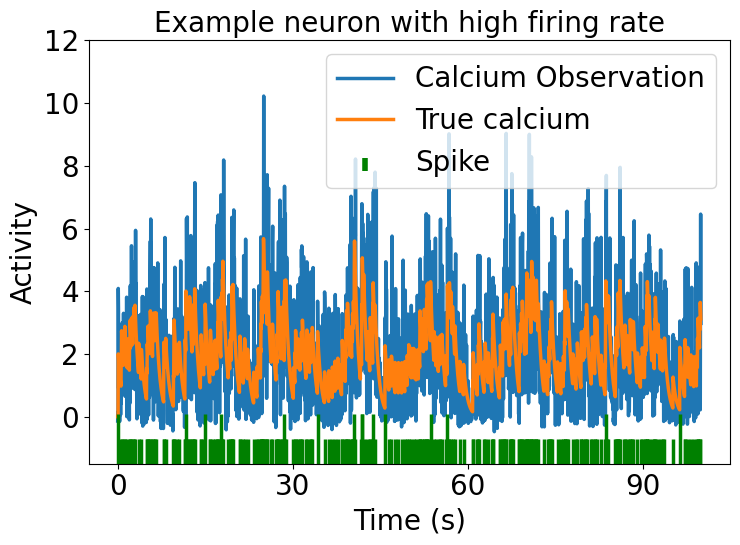

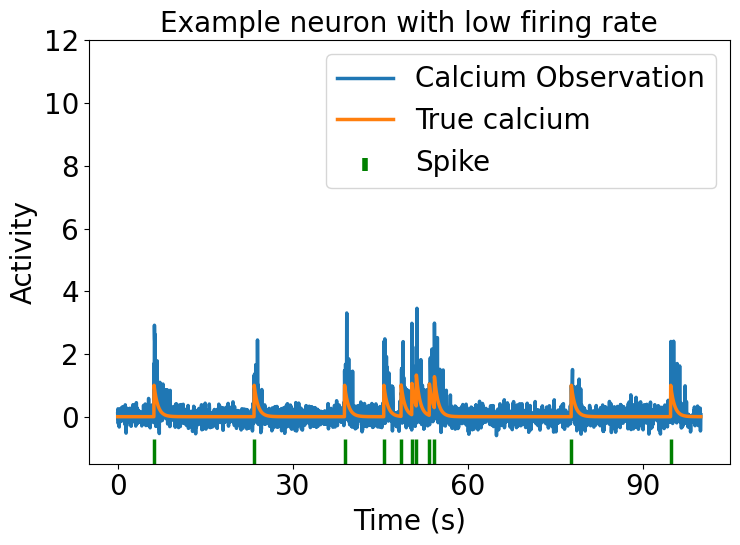

In [4]:

figsize_cm = (4,3)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
plot_data_i(y,c,s,i = 0, figsize = figsize, ymax = 12, linewidth = 0.5*scale,savepath=savepath,
            title = 'Example neuron with high firing rate',
            titlesize = SMALL_SIZE, xtick_s = True, framerate = 30, xtickgap = 30)
plot_data_i(y,c,s,i = 3, figsize = figsize, ymax = 12, linewidth = 0.5*scale,savepath=savepath,
            title = 'Example neuron with low firing rate',
            titlesize = SMALL_SIZE,xtick_s = True, framerate = 30, xtickgap = 30)

In [5]:
model_names =['pca','mlpca','fa','bpca_common','xbpca_common','mbpca_common','bpca_individual','xbpca_individual','mbpca_individual']
score_names  = ['lb','log_like','evs','mse','r2','nef','corr']
savepath = './figs/artificial_data_calcium'
models = Models(model_names = model_names, savepath = savepath)
models_results = models.fit(y,z = c,q = 3, seed=method_seed, score_names = score_names,
                            imshow_wxyq = False,verbose = False, nef_tol =0.01)
                            # find_best_seed=True, score_name ='evs', seed_range = range(10))



In [6]:
# def imshow_model_wxyq(models_results, model_name = 'pca', cmap ='RdBu_r', 
#                       wmax = 1, xmax = 3, ymax = 8, ymin = 0, 
#                       figsize_cm = (15,5), savepath = None, title='PCA'):
#     from fun_models_class import imshow_wxyq
#     model = models_results[model_name]
#     W = model['W']
#     x = model['X']
#     yq = model['yq']
#     figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)

#     imshow_wxyq(W,x, yq,  cmap =cmap, wmax = wmax, xmax = xmax, ymax = ymax, ymin = ymin,
#                 model_name =model_name,title = title, figsize = figsize, savepath = savepath)
    

from fun_models_class import imshow_model_wxyq


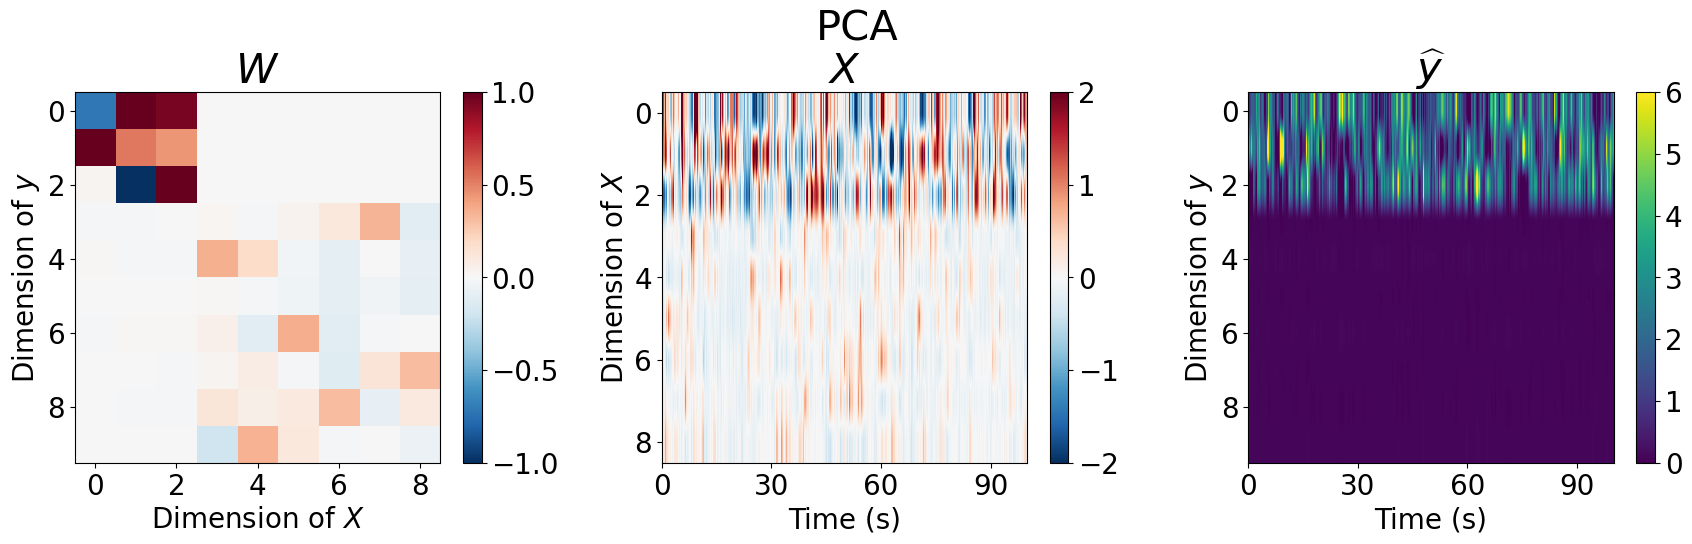

In [7]:
figsize_cm = (9,2.9)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
xtick_s = True
framerate = 30
xtickgap =30
imshow_model_wxyq(models_results, model_name ='pca',figsize =figsize , title ='PCA',
                  wmax = 1, xmax = 2 , ymax = 6, ymin = 0, savepath=savepath,
                  xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

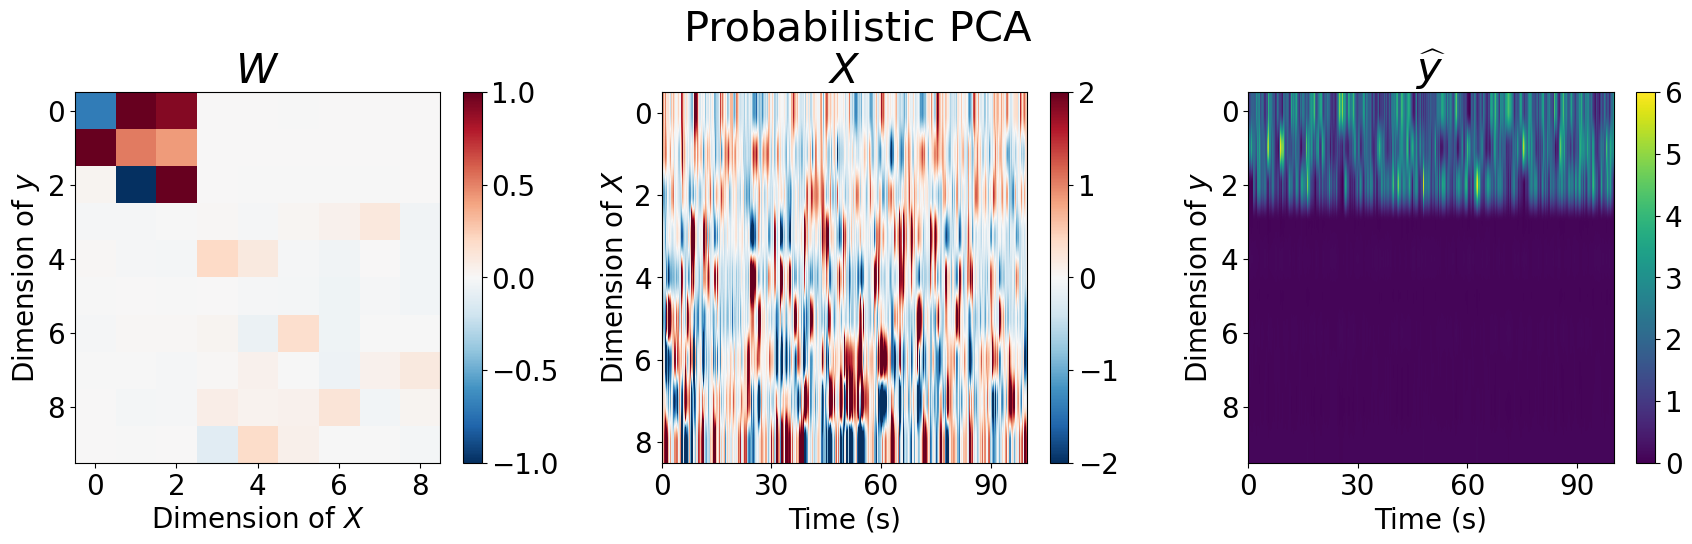

In [8]:
imshow_model_wxyq(models_results, model_name ='mlpca',figsize =figsize, title = 'Probabilistic PCA',
                wmax = 1, xmax = 2 , ymax = 6, ymin = 0,savepath=savepath,
                xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

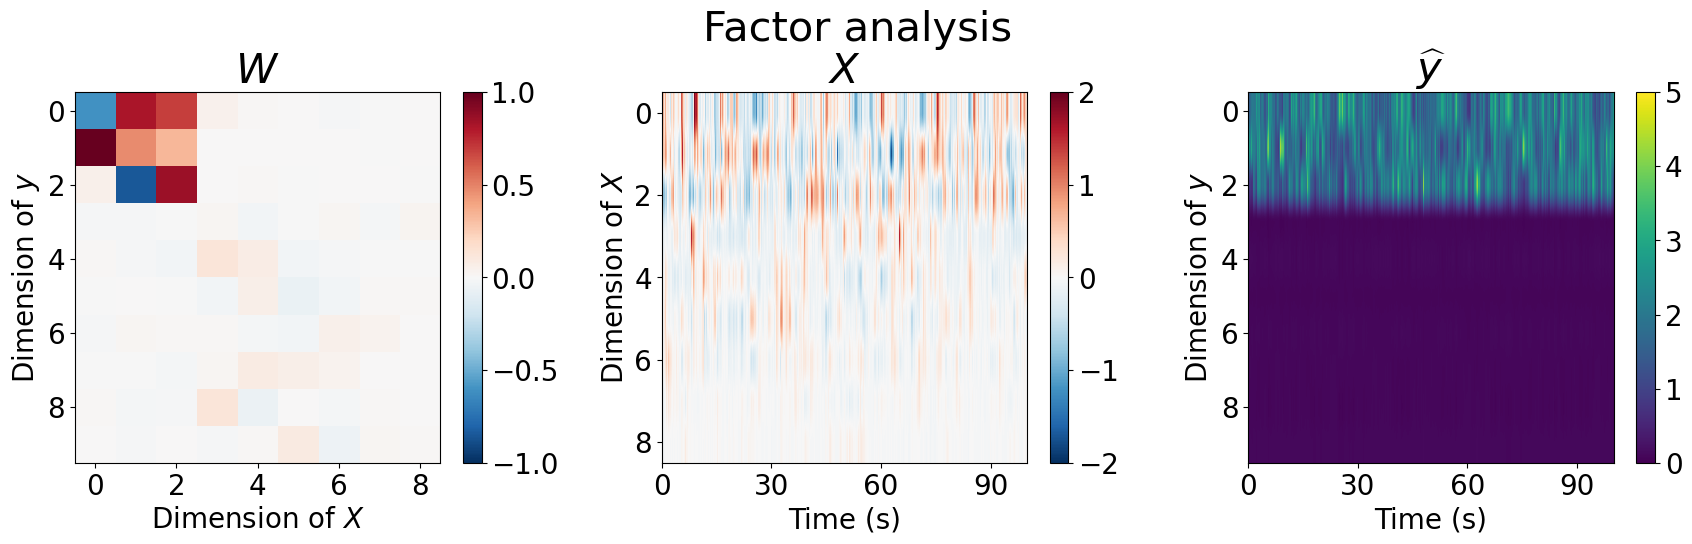

In [9]:
imshow_model_wxyq(models_results, model_name ='fa',title = 'Factor analysis',figsize =figsize,
                  wmax = 1, xmax = 2 , ymax = 5, ymin = 0 ,savepath=savepath,
                xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

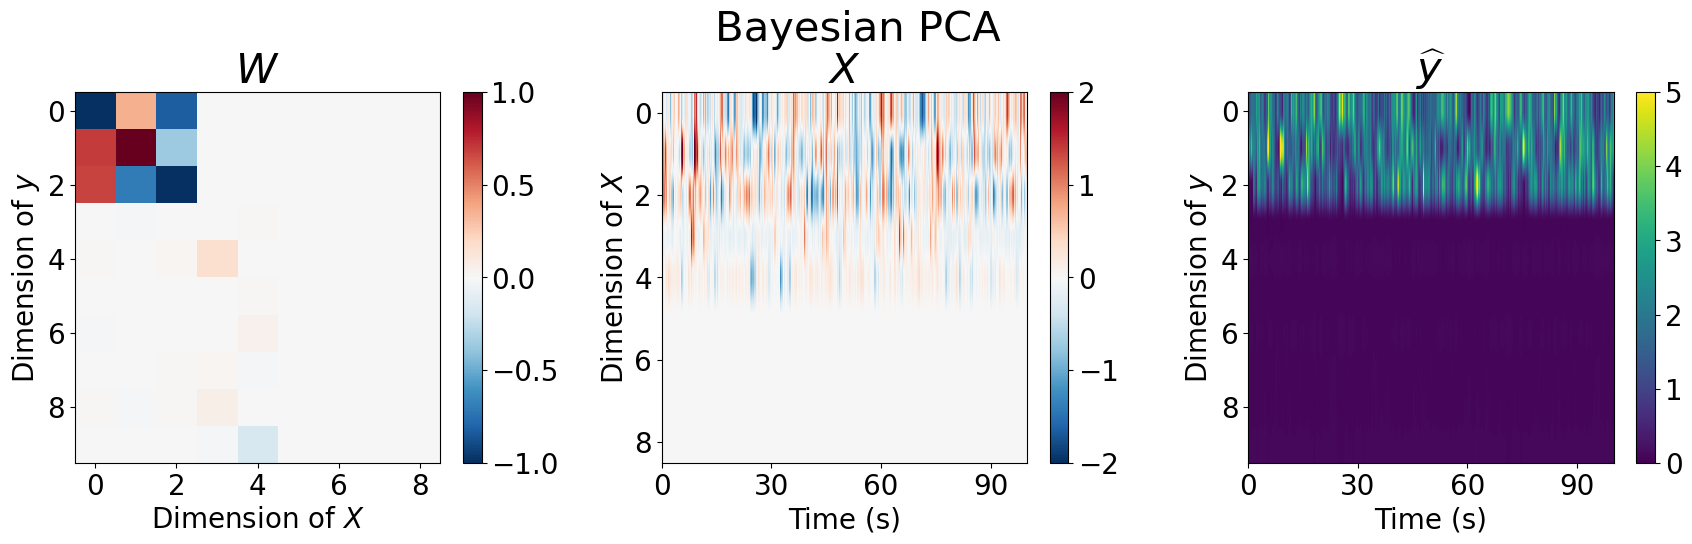

In [10]:
imshow_model_wxyq(models_results, model_name ='bpca_common',title = 'Bayesian PCA',figsize =figsize,
                  wmax = 1, xmax = 2 , ymax = 5, ymin = 0 ,savepath=savepath,
                xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

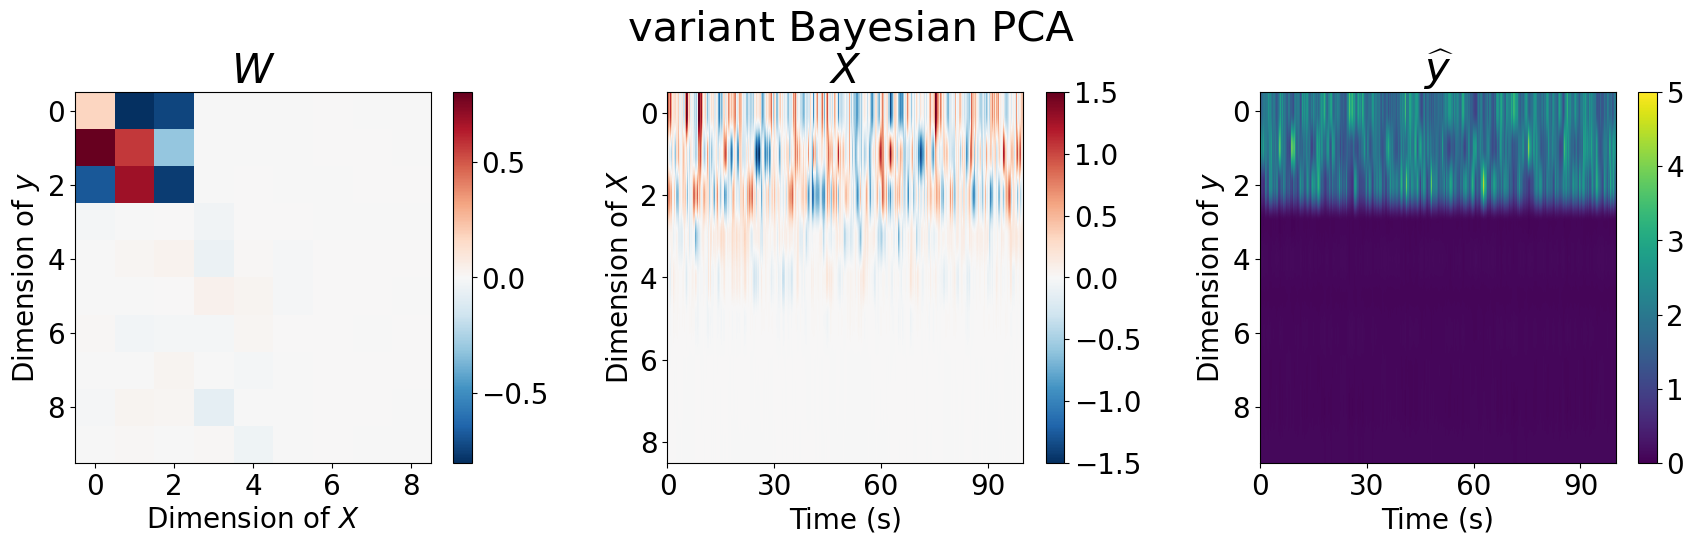

In [11]:
imshow_model_wxyq(models_results, model_name ='bpca_individual',title = 'variant Bayesian PCA ',figsize =figsize,
                  wmax =0.8, xmax = 1.5, ymax = 5,savepath=savepath,
                xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

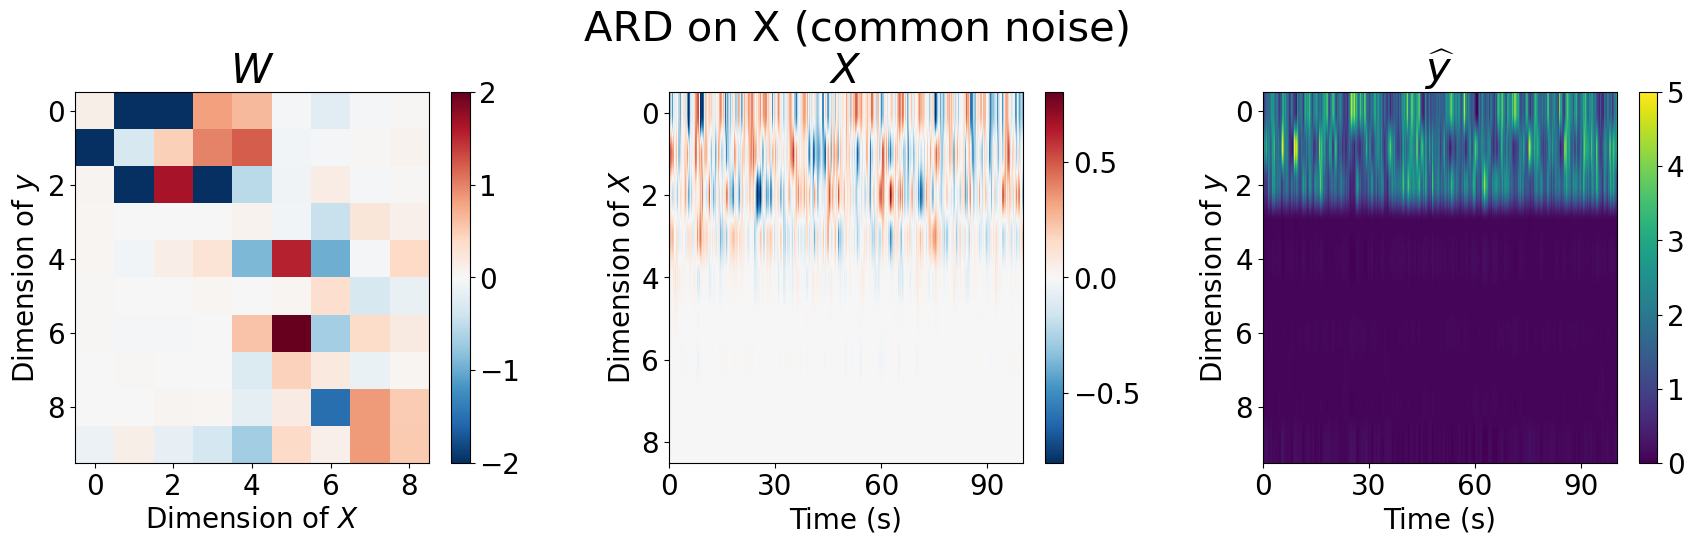

In [12]:
imshow_model_wxyq(models_results, model_name ='xbpca_common',title = 'ARD on X (common noise)',figsize =figsize,
                  wmax =2, xmax = 0.8, ymax = 5,savepath=savepath,
                xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

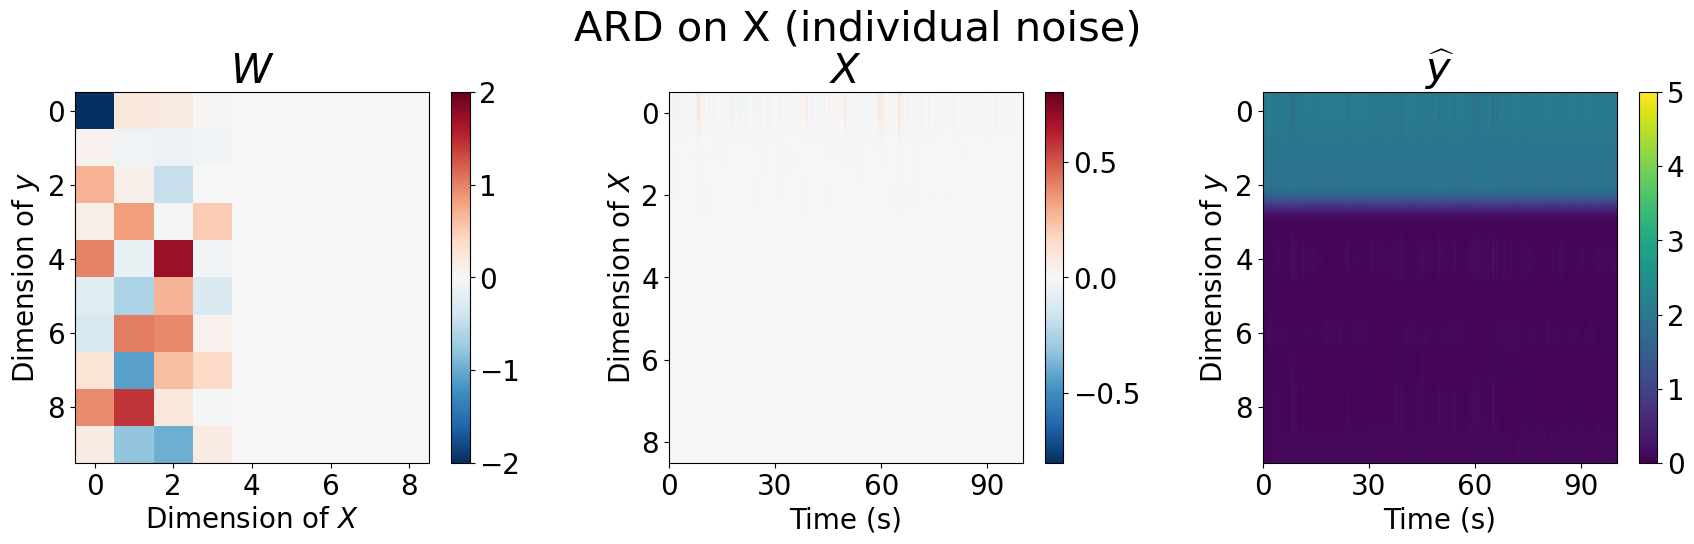

In [13]:
imshow_model_wxyq(models_results, model_name ='xbpca_individual',title = 'ARD on X (individual noise)',figsize =figsize,
                  wmax =2, xmax = 0.8, ymax = 5,savepath=savepath,
                xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

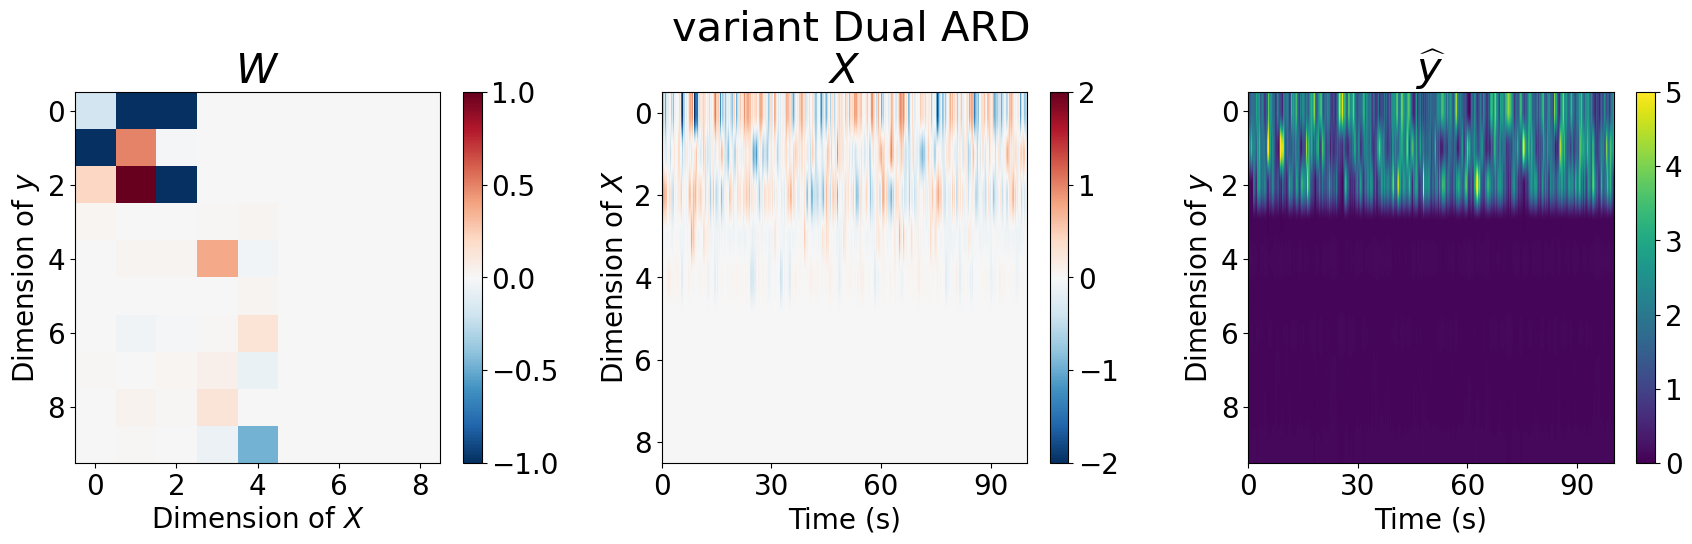

In [14]:
imshow_model_wxyq(models_results, model_name ='mbpca_common',
                  title = 'variant Dual ARD ',figsize =figsize,
                  wmax =1, xmax = 2, ymax = 5,savepath=savepath,
                xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

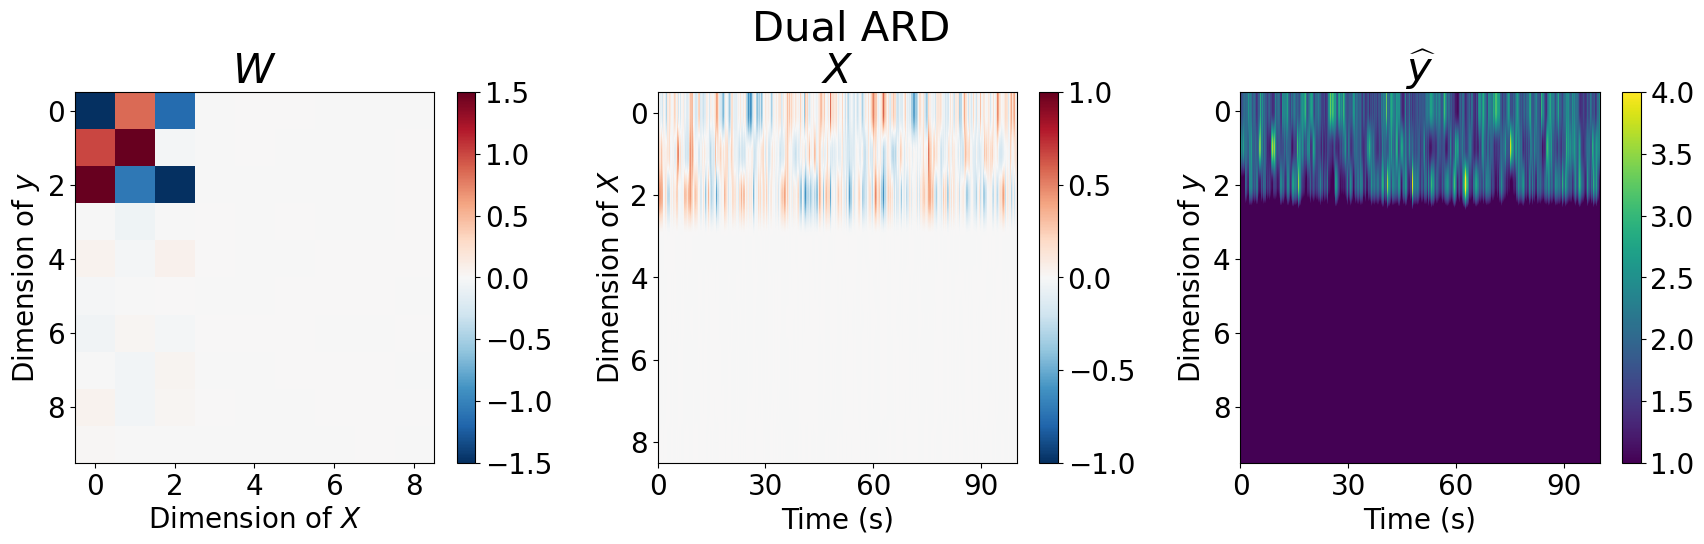

In [15]:
imshow_model_wxyq(models_results, model_name ='mbpca_individual',
                  title = 'Dual ARD ',figsize =figsize,
                  wmax =1.5, xmax = 1, ymax = 4, ymin = 1,savepath=savepath,
                xtick_s = xtick_s, framerate = framerate, xtickgap =xtickgap)

In [16]:
# def plot_model_comparison_twinx(scores_models, loc = 'best',savepath = None,
#                                 ylims=[None,None],figsize = None,
#                                 ticksize = 4, xticks = None):
#     import fun_plots;reload(fun_plots)
#     from fun_plots import pointplot_2axis
#     import pandas as pd
#     model_names=scores_models.keys()
#     df_scores_models = pd.DataFrame(scores_models).T
#     ylabels =['Explained variance score (EVS)','Mean squared error (MSE)']
#     labels =['EVS','MSE']
#     colors =['darkblue','peru']
#     title ='Model Performance'
    
#     pointplot_2axis(df_scores_models['r2'],df_scores_models['mse'],
#                     model_names=model_names,labels = labels,ylabels=ylabels,
#                     colors =colors,title =title,loc = loc,savepath=savepath,ylims = ylims, 
#                     figsize = figsize, ticksize = ticksize, 
#                     xticks = xticks)

from fun_models_class import plot_model_comparison_twinx


In [17]:
scores_models = dict()
model_names =['pca','mlpca','fa','bpca_common','mbpca_common','bpca_individual','mbpca_individual']

for model_name in model_names:

    model_results = models_results[model_name]
    scores = model_results['scores']
    
    scores_models[model_name] = dict()
    scores_models[model_name]['evs'] = scores['evs']
    scores_models[model_name]['r2'] = scores['r2']
    scores_models[model_name]['mse'] = scores['mse']
    scores_models[model_name]['nef'] = scores['nef']




In [18]:
from fun_models_class import get_model_name_labels
model_name_labels = get_model_name_labels(model_names)

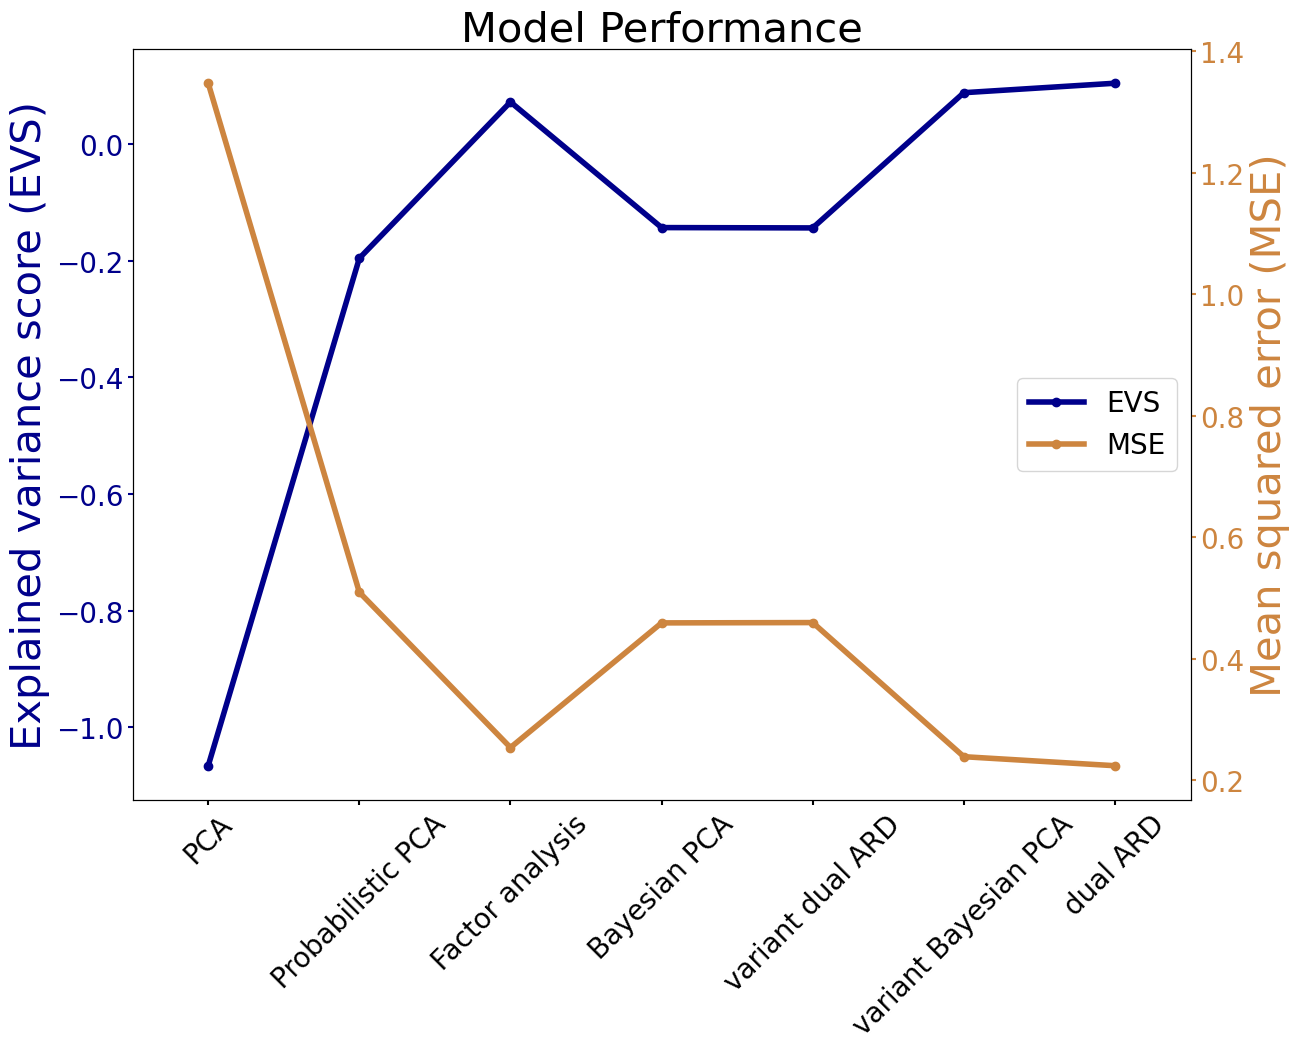

In [19]:
figsize_cm = (7, 5)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels


plot_model_comparison_twinx(scores_models,figsize = figsize,  ylims = [None, None], loc ='right',
                            ticksize = SMALL_SIZE,savepath=savepath, xticks = model_name_labels)

In [20]:
# plot corr and nef 
# nef_models = dict()
# nef_models['pca'] = 9
# nef_models['mlpca'] = 9
# nef_models['fa'] = 9
# nef_models['bpca_common'] = 5
# nef_models['bpca_individual'] = 5 
# nef_models['mbpca_common'] = 5
# nef_models['mbpca_individual'] = 3

# for model_name in list(nef_models.keys()):
#     models.results_models[model_name]['scores']['nef'] = nef_models[model_name]

In [21]:
nef_models = dict()
for model_name in scores_models.keys():
    nef_models[model_name] =scores_models[model_name]['nef']


In [22]:


def plot_score_comparsion(score_models, score_name='evs',savepath = None,
                        ymin = None, ymax = None,
                         color ='k', ylabel='score', title =None,
                        figsize = (5,3), xticks = None):

    model_names = list(score_models.keys())
    score = np.zeros(len(model_names))
    for i in range(len(model_names)):
        model_name = model_names[i]
        score[i] = score_models[model_name]

    fig,ax = plt.subplots(figsize = figsize)
    ax.plot(score, 'o-', color =color)
    ax.set_ylim([ymin,ymax])
    ax.set_xticks(np.arange(len(model_names)))
    if xticks is None:
        xticks = model_names
    ax.set_xticklabels(xticks,rotation = 45)
    # ax.set_xlabel('Methods')
    if title is None:
        title = score_name
    ax.set_title(title)
    ax.set_ylabel(ylabel)

    if savepath is not None:
        filename = score_name+'.pdf'
        figfile = os.path.join(savepath, filename)
        plt.savefig(figfile,bbox_inches='tight')
    plt.show()

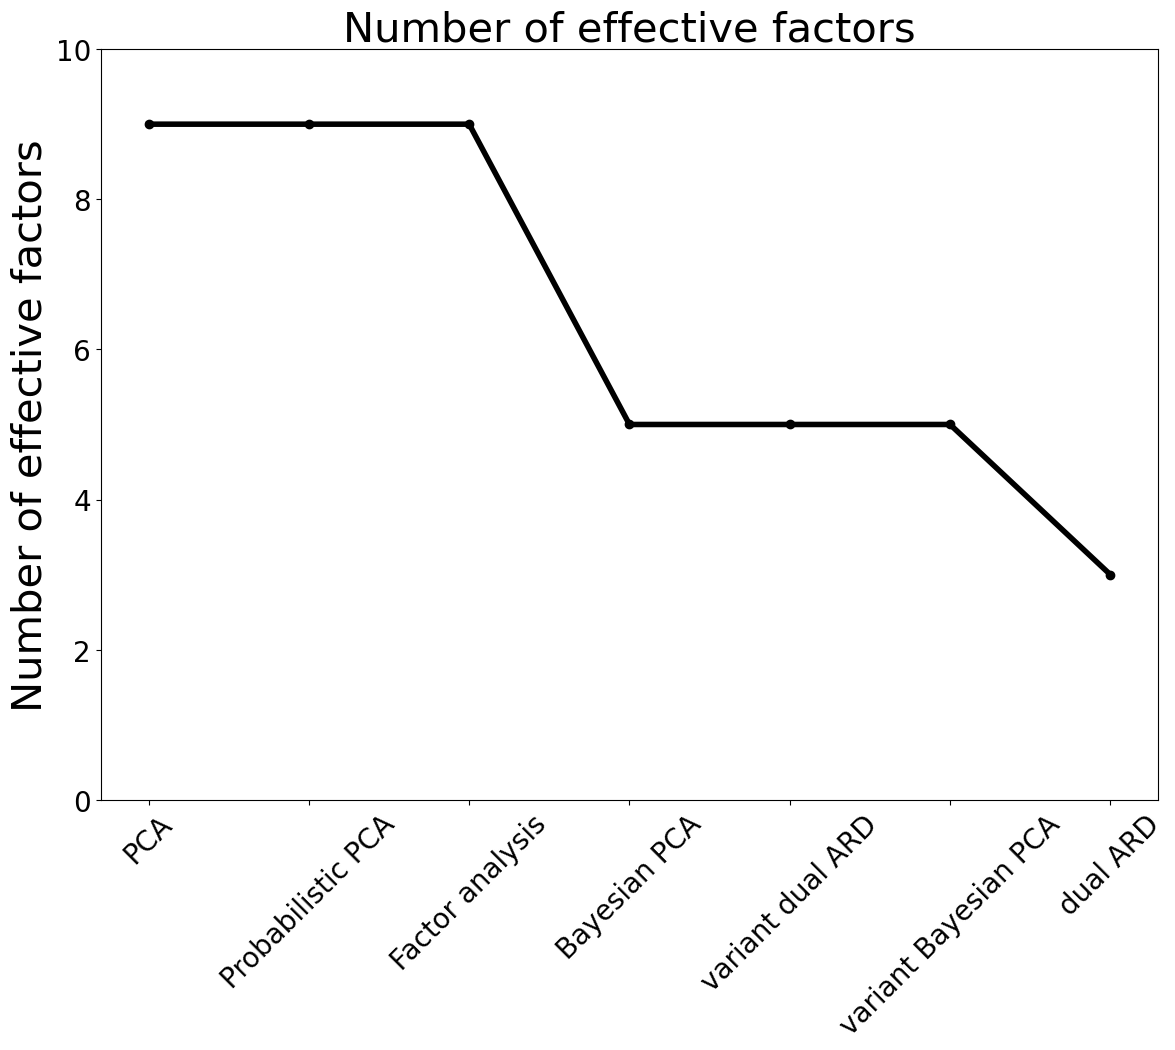

In [23]:

figsize_cm = (7, 5)
figsize = (figsize_cm[0]*scale*cm2inch,figsize_cm[1]*scale*cm2inch)
plot_score_comparsion(nef_models, score_name ='nef',figsize = figsize,
                      savepath = savepath, xticks = model_name_labels, 
                      title ='Number of effective factors', ymin = 0, ymax = 10, 
                      ylabel='Number of effective factors')

In [24]:
scores_models = dict()
for model_name in model_names:

    model_results = models_results[model_name]
    scores = model_results['scores']
    
    scores_models[model_name] = dict()
    sigma2 = model_results['sigma2']
    if np.isscalar(sigma2):
        sigma2 = sigma2*np.ones(model_results['X'].shape[0]+1)
    scores_models[model_name]['sigma2'] = sigma2
    for score_name in score_names:
        scores_models[model_name][score_name] = scores[score_name]
      
from fun_models_class import get_model_name_labels,plot_model_comparsion
model_name_labels = get_model_name_labels(model_names)


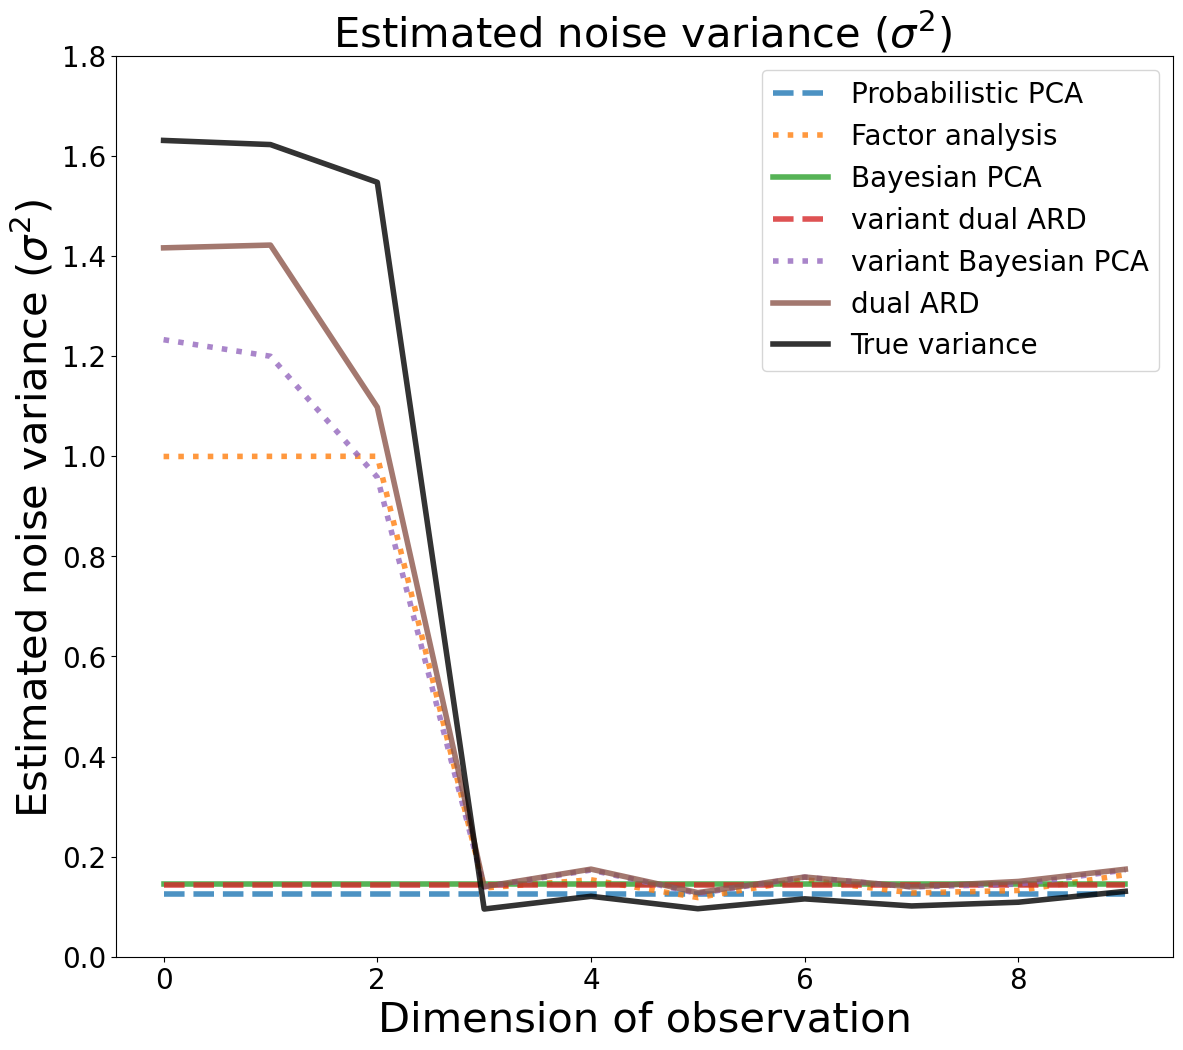

In [25]:
figsize_cm = (7, 6)
figsize = (figsize_cm[0]*scale*cm2inch, figsize_cm[1]*scale*cm2inch)
fig, ax = plt.subplots(figsize = figsize )
linestyles = ['solid','dashed','dotted',]*3
for i in np.arange(1,len(model_names)): 
    model_name = model_names[i]
    linestyle =linestyles[i]
    
    sigma2 = scores_models[model_name]['sigma2']
    ax.plot(sigma2, label = model_name_labels[i],
            alpha = 0.8, linestyle = linestyle)
true_sigma2=np.mean((y-c)**2, axis = 1)

ax.plot(true_sigma2, label = 'True variance', alpha = 0.8, c='k')
ax.set_ylim([0,1.8])
ax.set_xlabel('Dimension of observation')
ax.set_ylabel(r'Estimated noise variance ($\sigma^2$) ')
ax.set_title(r'Estimated noise variance ($\sigma^2$) ')
figname = os.path.join(savepath,'sigma2.pdf')
plt.legend()
fig.savefig(figname,bbox_inches ='tight')
plt.show()

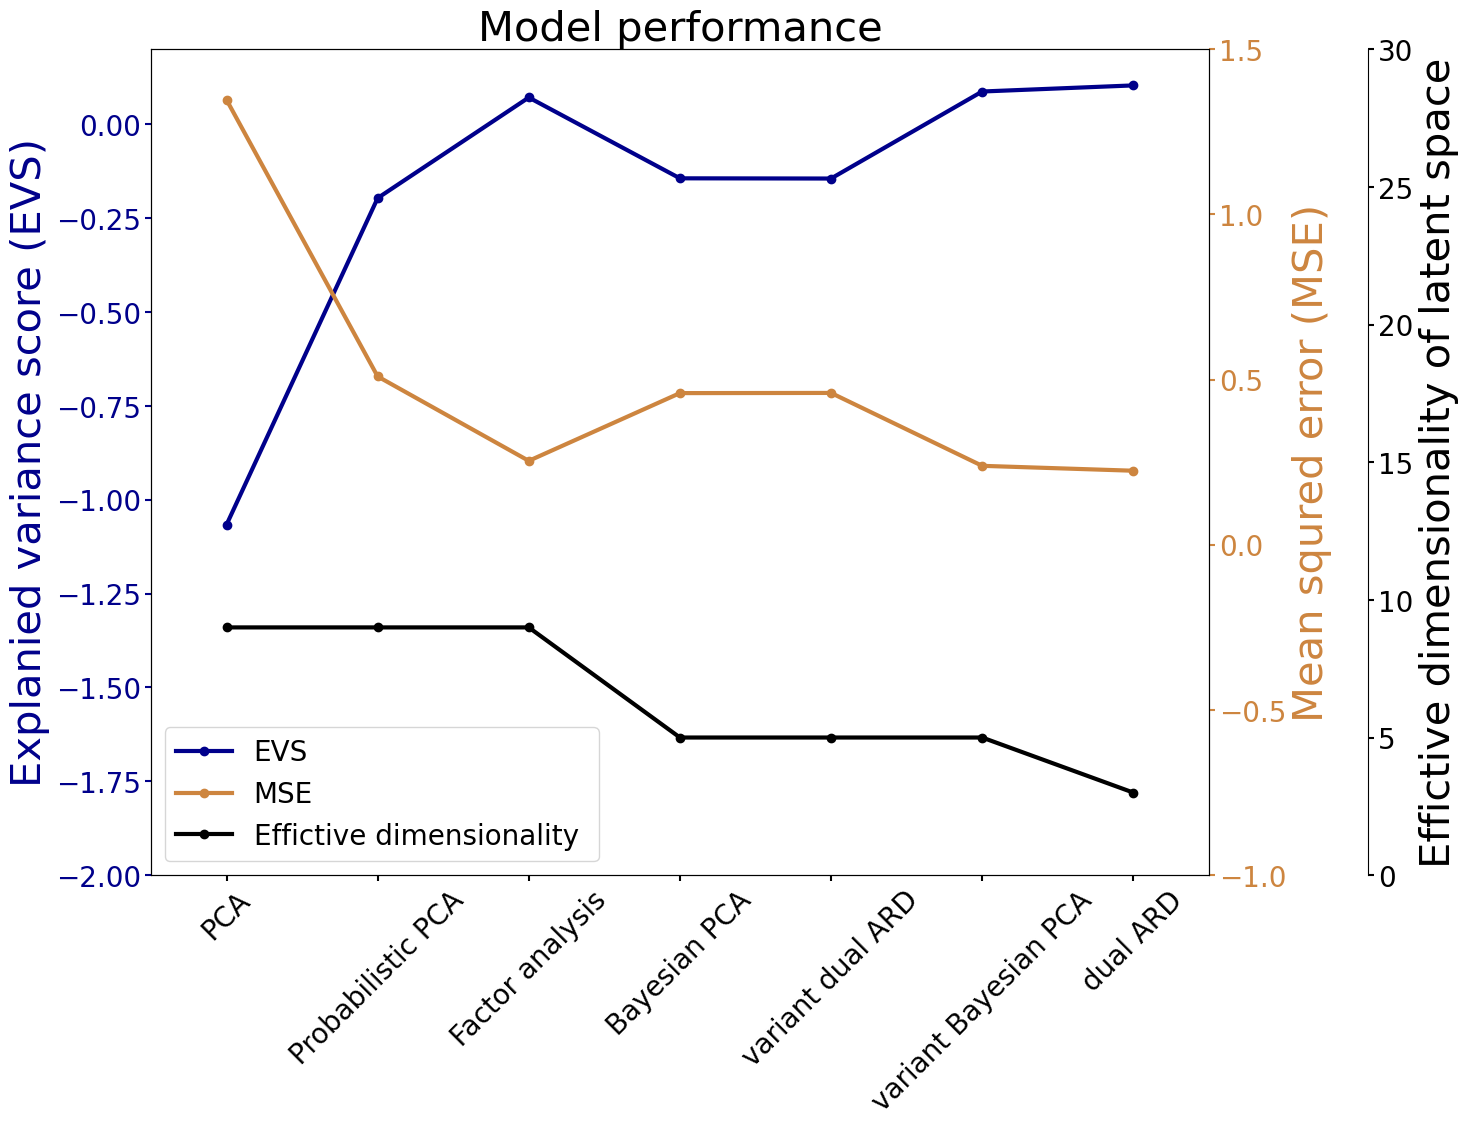

In [26]:
from fun_plots import pointplot_3axis
import pandas as pd
model_names=scores_models.keys()
df_scores_models = pd.DataFrame(scores_models).T
colors =['darkblue','peru','black']
ylabels = ['Explanied variance score (EVS)',
           'Mean squred error (MSE)',
           'Effictive dimensionality of latent space' ]

figsize_cm = (7, 5.5)
figsize = (figsize_cm[0]*scale*cm2inch,figsize_cm[1]*scale*cm2inch)
pointplot_3axis(df_scores_models['r2'],df_scores_models['mse'],df_scores_models['nef'],
                ylims = [[-2,0.2 ], [-1, 1.5], [0,30]],
                colors =colors,
                savepath=savepath,
                figsize = figsize, 
                labels =['EVS','MSE','Effictive dimensionality '],
                title ='Model performance',
                xticklabels = model_name_labels,
                ylabels = ylabels
                )